In [ ]:
import os
import math
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
cwd = os.getcwd()
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import display
from matplotlib.lines import Line2D
pd.options.display.max_columns = None

In [3]:
plt.style.use(['science'])
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
os.chdir(os.path.join(cwd,'../../..'))
import ExMAS.main
import ExMAS.utils
from ExMAS.utils import inData as inData
from ExMAS.main import matching

In [93]:
EXPERIMENT_NAME = 'game_results/r4'
KPIs = pd.read_csv('ExMAS/extras/{}_KPIs.csv'.format(EXPERIMENT_NAME), index_col = 0)
rides = pd.read_csv('ExMAS/extras/{}_rides.csv'.format(EXPERIMENT_NAME), index_col = 0)
rm = pd.read_csv('ExMAS/extras/{}_rm.csv'.format(EXPERIMENT_NAME), index_col = [0,1])

In [94]:
EXPERIMENT_NAME = 'r4'
PRICINGS = ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']

for i,PRICING in enumerate(PRICINGS):
    
    for j, ALGO in enumerate(['EXMAS', 'TNE', 'HERMETIC', 'RUE', 'RSIE', 'TSE']):
        col_name = "pruned_Pricing-{}_Pruning-['{}']".format(PRICING, ALGO)
        rm[col_name] = rm.apply(lambda r: rides.loc[r.ride][col_name], axis = 1)

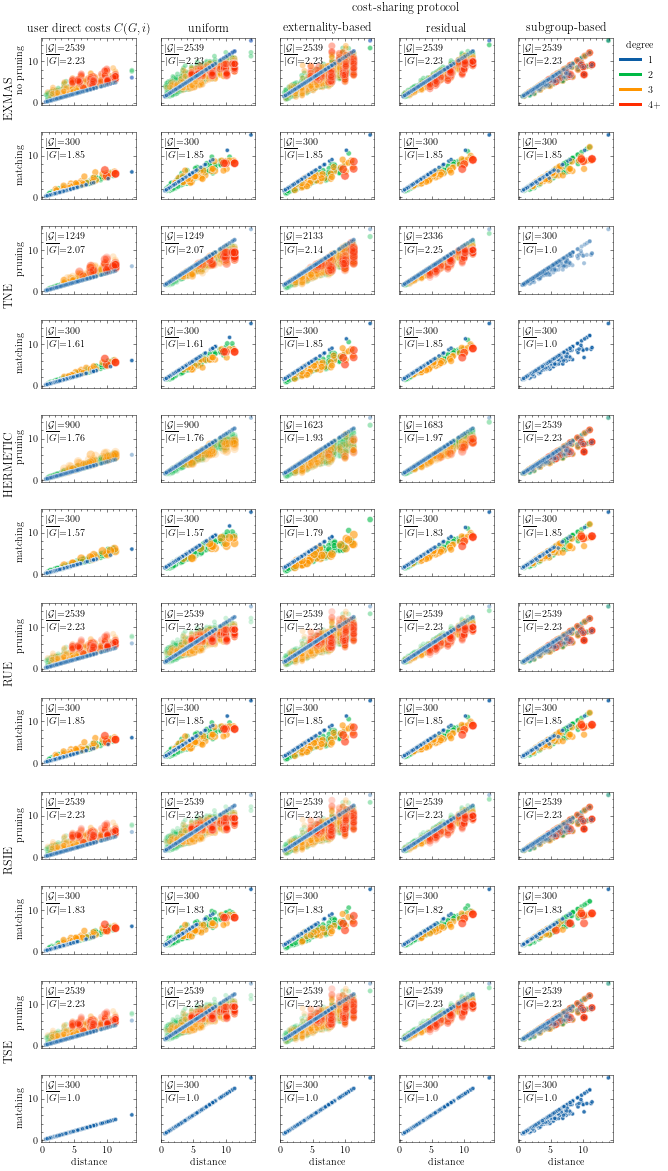

In [128]:
df = rm
palette = sns.color_palette(colors[0:4])
df['travel time'] = df['ttrav_sh']
df['user discomfort'] = df['cost_user']
cols = ['user discomfort','UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']
ALGOS = ['EXMAS','TNE', 'HERMETIC', 'RUE', 'RSIE', 'TSE']
titles = ['user direct costs $C(G,i)$','uniform', 'externality-based','residual','subgroup-based']

fig, axes = plt.subplots(12,len(cols), figsize = (len(cols)*2,1.5*2*6), sharey=True, sharex = True)
df['deg'] = df.degree.apply(lambda x: '4+' if x>3 else str(x))
df['distance'] = df['dist']/1000
df['size'] = df['degree']**2 

def single_scatter(col, df, ax, alpha = 0.2, legend = False, text = True):
    pal = sns.color_palette(colors[0:df.deg.nunique()])
    sns.scatterplot(x='distance',y=col, data = df, ax = ax, hue = 'deg', alpha = alpha, palette = pal, size = df['size'])
    sns.scatterplot(x='distance',y=col, data = df[df.degree==1], ax = ax, alpha = alpha, color = colors[0], size = df['size'])
    if not legend:
        ax.get_legend().remove()
    if text:
        label = "$|\mathcal{G}|$="+ str(df.shape[0]) +"\n$\overline{|G|}$="+ str(round(df.degree.mean(),2))
        ax.text(0.05,0.6,label,rotation=0, fontsize = 10, transform=ax.transAxes)
        

for i,col in enumerate(cols):
        
    axes[0][i].set_title(titles[i])
    sns.scatterplot(x='distance',y=col, data = df, ax = axes[0][i], hue = 'deg', alpha = 0.2, palette = palette, size = df['size'])
    if col is not 'SUBGROUP':
        sns.scatterplot(x='distance',y=col, data = df[df.degree==1], ax = axes[0][i], alpha = 0.2, color = 'blue', size = df['size'])    
    
    for j, ALGO in enumerate(ALGOS):
                            
        matching_column = "Experiment-r4_Pricing-{}_Objective-['total_group_cost']_Pruning-['{}']_minmax-min".format('UNIFORM' if col == 'user discomfort' else col,ALGO)
        pruning_column = "pruned_Pricing-{}_Pruning-['{}']".format('UNIFORM' if col == 'user discomfort' else col, ALGO)
        single_scatter(col, df = df[df[pruning_column]==True], ax = axes[2*j][i], legend = False)
        
        single_scatter(col, df = df[df[matching_column]==1], ax = axes[2*j+1][i], alpha = 0.6)
        #axes[2*j][0].set_ylabel('no pruning' if ALGO == 'EXMAS' else ALGO + " pruning")
        #axes[2*j+1][0].set_ylabel('no pruning match' if ALGO == 'EXMAS' else ALGO + " matching")
        if i ==0:
            axes[2*j][0].set_ylabel("pruning")
            axes[2*j+1][0].set_ylabel("matching")
            axes[2*j][0].text(-0.4, -0.2, ALGO,rotation='vertical', transform=axes[2*j][0].transAxes, fontsize = 12)
            
    if i>0:
        axes[0][i].set_ylabel('')
    else:
        axes[0][i].set_ylabel('no pruning')
custom = [Line2D([], [], marker='', color=colors[i], linestyle='-', lw = 3) for i in [0,1,2,3]]

axes[0][4].legend(custom, ['1', '2','3','4+'], loc='upper right',bbox_to_anchor=(1.6, 1.1), title = 'degree')          
        
    #if i<len(cols)-1:
    #    axes[0][i].get_legend().remove()
fig.text(0.5, 0.95,'cost-sharing protocol', fontsize = 12)
plt.tight_layout(rect=[0, 0.05, 0.95, 0.95])
plt.savefig('scatters.png')

In [88]:
EXPERIMENT_NAME = 'subs'
KPIs = pd.read_csv('ExMAS/extras/{}_KPIs.csv'.format(EXPERIMENT_NAME), index_col = 0)
rides = pd.read_csv('ExMAS/extras/{}_rides.csv'.format(EXPERIMENT_NAME), index_col = 0)
rm = pd.read_csv('ExMAS/extras/{}_rm.csv'.format(EXPERIMENT_NAME), index_col = [0,1])

In [89]:
EXPERIMENT_NAME = 'subs'
PRICINGS = ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']
for i,PRICING in enumerate(PRICINGS):    
    for j, ALGO in enumerate(['EXMAS', 'TNE', 'HERMETIC', 'RUE', 'RSIE', 'TSE']):        
        col = "Experiment-{}_Pricing-{}_Objective-['total_group_cost']_Pruning-['{}']_minmax-min".format(EXPERIMENT_NAME, PRICING, ALGO)        
        rm['bestpossible_{}_{}'.format(PRICING,ALGO)] = rm.apply(lambda r: rm[(rm.traveller == r.traveller) & (rm[col] == 1)][PRICING].min(), axis=1)


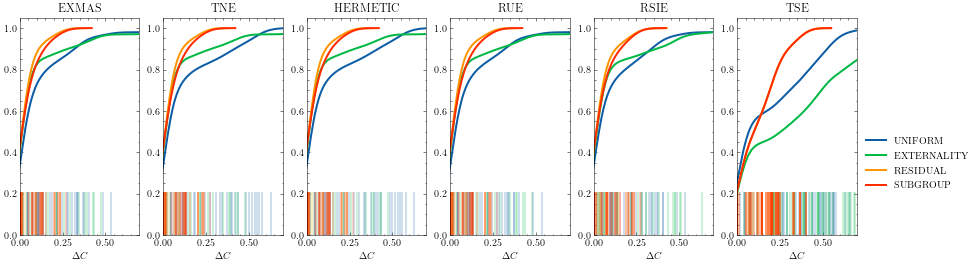

In [92]:
PRICINGS = ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']
fig, axes = plt.subplots(1,6, figsize = (15,4))
j=-1
for i,PRICING in enumerate(PRICINGS):
    
    for j, ALGO in enumerate(['EXMAS', 'TNE', 'HERMETIC', 'RUE', 'RSIE', 'TSE']):
        
        col = "Experiment-{}_Pricing-{}_Objective-['total_group_cost']_Pruning-['{}']_minmax-min".format(EXPERIMENT_NAME, PRICING, ALGO)
        to_plot = rm[rm[col] == 1]
        
        to_plot['$\Delta C$']=(to_plot[PRICING]-to_plot['desired_{}'.format(PRICING)])/to_plot['desired_{}'.format(PRICING)]
        sns.distplot(to_plot['$\Delta C$'],ax = axes[j], kde = True, hist = False, label = PRICING, rug_kws={"alpha":0.2, 'height':0.2, 'lw':2}, kde_kws={'bw':0.05, 'lw': 2, 'cumulative': True}, rug = True) 
        axes[j].set_xlim((0,0.7))
        axes[j].set_title(ALGO)
        #axes[j].set_yscale('log')
        axes[j].get_legend().remove()
        #axes[j].set_ylim((0.1,1))
axes[-1].legend(bbox_to_anchor=(1, 0.5))
plt.savefig('hist.png', dpi = 600)

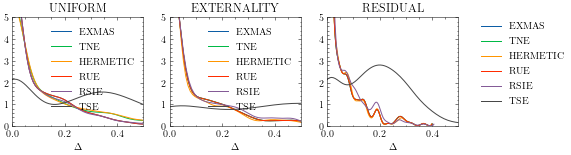

In [12]:
PRICINGS = ['UNIFORM','EXTERNALITY','RESIDUAL']
fig, axes = plt.subplots(1,3, figsize = (8,2))
j=-1
for i,PRICING in enumerate(PRICINGS):
    
    for j, ALGO in enumerate(['EXMAS', 'TNE', 'HERMETIC', 'RUE', 'RSIE', 'TSE']):
        
        col = "Experiment-{}_Pricing-{}_Objective-['total_group_cost']_Pruning-['{}']_minmax-min".format(EXPERIMENT_NAME, PRICING, ALGO)
        to_plot = rm[rm[col] == 1]
        to_plot['$\Delta$']=(to_plot[PRICING]-to_plot['desired_{}'.format(PRICING)])/to_plot['desired_{}'.format(PRICING)]
        sns.distplot(to_plot['$\Delta$'],ax = axes[i], kde = True, hist = False, label = ALGO) 
        axes[i].set_xlim((0,0.5))
        axes[i].set_title(PRICING)
        axes[i].set_ylim((0,5))
axes[-1].legend(bbox_to_anchor=(1.1, 1.05))
plt.savefig('hist2.png', dpi = 600)

In [96]:
KPIs['pricing'] = KPIs.apply(lambda x: x.name.split("_")[1].split("-")[1],axis =1)
KPIs['$T_i$'] = KPIs['PassHourTrav']/3600
KPIs['$T_G$'] = KPIs['VehHourTrav']/3600
#KPIs['prun'] = KPIs.apply(lambda x: x.algo[2:-2] if "[" in x.algo else x.algo,axis =1)
#KPIs['prun'] = KPIs.apply(lambda x: 'EXMAS' if len(x.prun) == 0 else x.prun,axis =1)
KPIs['$C$'] = KPIs['cost_user']

<AxesSubplot:xlabel='algo', ylabel='$T_i$'>

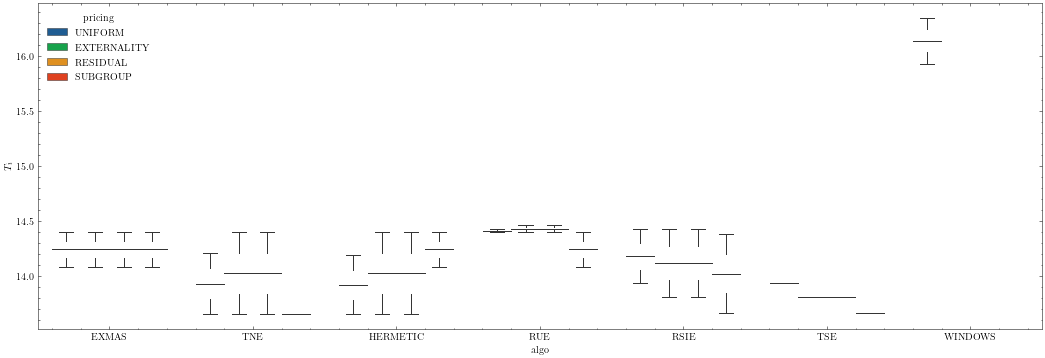

In [112]:
fig, axes = plt.subplots(figsize = (18,6))
flierprops = dict(markerfacecolor='0.75', markersize=5,
              linestyle='none')
sns.boxplot(y = '$T_i$', x = 'algo', hue = 'pricing', data = KPIs,linewidth = 1,  showfliers=True, ax = axes, boxprops=dict(alpha=.0), whis = [0,100])

In [138]:
df = KPIs[['pricing','algo','$T_i$','$T_G$', '$C$','minmax']].set_index(['pricing','algo']).dropna()
mins = df[df.minmax == 'min']
maxs = df[df.minmax == 'max']
df = mins.join(maxs, lsuffix=' stability', rsuffix = ' anarchy')
df = df[['$T_i$ stability','$T_i$ anarchy','$T_G$ stability','$T_G$ anarchy', '$C$ stability', '$C$ anarchy']]
#df.columns = ['pricing' , 'algo','$T_i$ min','$T_i$ max','$T_G$ min','$T_G$ max', '$C$ min', '$C$ max']
print(df.round(1).to_latex())
df.round(1)

\begin{tabular}{llrrrrrr}
\toprule
         &     &  \$T\_i\$ stability &  \$T\_i\$ anarchy &  \$T\_G\$ stability &  \$T\_G\$ anarchy &  \$C\$ stability &  \$C\$ anarchy \\
pricing & algo &                  &                &                  &                &                &              \\
\midrule
UNIFORM & EXMAS &             49.3 &           47.4 &             32.7 &           44.6 &          688.7 &        668.3 \\
         & TNE &             48.5 &           46.1 &             34.7 &           46.1 &          654.1 &        580.8 \\
         & HERMETIC &             48.3 &           46.1 &             35.1 &           46.1 &          649.5 &        580.8 \\
         & RUE &             49.3 &           49.2 &             32.7 &           40.4 &          688.7 &        741.9 \\
         & RSIE &             49.3 &           46.6 &             33.0 &           45.9 &          687.3 &        603.1 \\
         & TSE &             46.6 &           46.6 &             46.1 &        

$T_i$ stability  $T_i$ anarchy  $T_G$ stability  \
pricing     algo                                                        
UNIFORM     EXMAS                49.3           47.4             32.7   
            TNE                  48.5           46.1             34.7   
            HERMETIC             48.3           46.1             35.1   
            RUE                  49.3           49.2             32.7   
            RSIE                 49.3           46.6             33.0   
            TSE                  46.6           46.6             46.1   
EXTERNALITY EXMAS                49.3           47.4             32.7   
            TNE                  49.3           46.1             32.7   
            HERMETIC             49.0           46.1             33.1   
            RUE                  49.3           49.5             32.7   
            RSIE                 49.3           46.2             33.4   
            TSE                  46.2           46.2             46.1   
RESIDUAL    EXMAS                49.3           47.4             32.7   
            TNE                  49.3           46.1             32.7   
            HERMETIC             49.1           46.1             33.0   
            RUE                  49.3           49.6             32.7   
            RSIE                 49.3           46.2             33.5   
            TSE                  46.2           46.2             46.1   
SUBGROUP    EXMAS                49.3           47.4             32.7   
            TNE                  46.1           46.1             46.1   
            HERMETIC             49.3           47.4             32.7   
            RUE                  49.3           47.4             32.7   
            RSIE                 49.2           46.3             33.6   
            TSE                  46.3           46.3             46.1   

                      $T_G$ anarchy  $C$ stability  $C$ anarchy  
pricing     algo                                                 
UNIFORM     EXMAS              44.6          688.7        668.3  
            TNE                46.1          654.1        580.8  
            HERMETIC           46.1          649.5        580.8  
            RUE                40.4          688.7        741.9  
            RSIE               45.9          687.3        603.1  
            TSE                46.1          580.8        580.8  
EXTERNALITY EXMAS              44.6          688.7        668.3  
            TNE                46.1          688.7        580.8  
            HERMETIC           46.1          684.0        580.8  
            RUE                39.8          688.7        755.7  
            RSIE               46.0          685.2        587.1  
            TSE                46.1          580.8        580.8  
RESIDUAL    EXMAS              44.6          688.7        668.3  
            TNE                46.1          688.7        580.8  
            HERMETIC           46.1          682.8        580.8  
            RUE                39.7          688.7        758.1  
            RSIE               46.0          683.3        587.1  
            TSE                46.1          580.8        580.8  
SUBGROUP    EXMAS              44.6          688.7        668.3  
            TNE                46.1          580.8        580.8  
            HERMETIC           44.6          688.7        668.3  
            RUE                44.6          688.7        668.3  
            RSIE               46.0          685.4        592.1  
            TSE                46.1          580.8        580.8

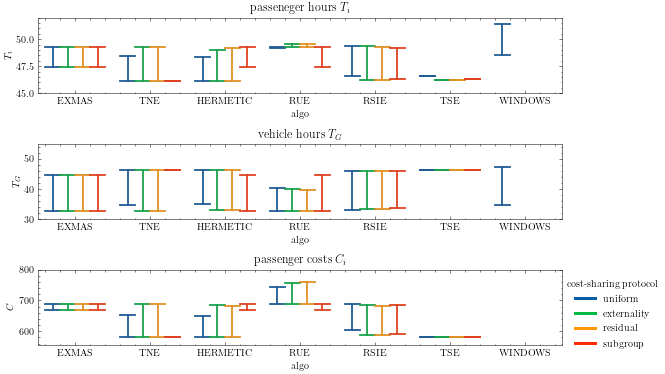

In [137]:
fig, axes = plt.subplots(3,1, figsize = (10,6))
axes = axes.flatten()
titles = ['passeneger hours $T_i$', 'vehicle hours $T_G$', 'passenger costs $C_i$']
for i, KPI in enumerate(['$T_i$','$T_G$', '$C$']):
    sns.barplot(y = KPI, x = 'algo', hue = 'pricing', data = KPIs, alpha = 0, ci = 100, capsize = 0.2, ax = axes[i])
    #sns.barplot(y = KPI, x = 'algo', hue = 'pricing', data = KPIs[KPIs.minmax == 'min'], alpha = 1, ci = 100, capsize = 0.05, ax = axes[i])

    axes[i].get_legend().remove()
    axes[i].set_title(titles[i])
    patches = axes[i].patches
    capsize = .1
    lines_per_err = 1 if capsize is None else 3

    for i, line in enumerate(axes[i].get_lines()):
        newcolor = patches[i // lines_per_err].get_facecolor()
        line.set_color(newcolor)
        line.set_alpha(1)
axes[0].set_ylim((45,52))
axes[1].set_ylim((30,55))
axes[2].set_ylim((555,800))
custom = [Line2D([], [], marker='', color=colors[i], linestyle='-', lw = 3) for i in [0,1,2,3]]

axes[2].legend(custom, ['uniform','externality','residual','subgroup'], loc='upper right',bbox_to_anchor=(1.2, 1), title = 'cost-sharing protocol') 



#connector, caplines, (vertical_lines,) = container.errorbar.lines
#vertical_lines.set_color(colors)
plt.tight_layout(rect=[0, 0.05, 0.95, 0.95])
plt.savefig('bars.png',dpi=600)

---
(c) Rafał Kucharski, Delft, 2020